In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

In [1]:
import numpy as np
from manim import *
import itertools

Manim Community v0.11.0

In [2]:
def create_node(scene, label, pos=[]):
  if pos:
    node = Circle(radius=0.5, color=BLUE).shift(*pos)
    anno = MathTex(label).shift(*pos)
  else:
    node = Circle(radius=0.5, color=BLUE)
    anno = MathTex(label)

  # scene.play(Create(node), Write(anno))
  return node, anno, Create(node), Write(anno)

# create lines pair-wise; start_nodes * end_nodes
# returns a list containing the lines created
def create_edges(scene, start_nodes, end_nodes):
  edges = list(map(lambda pair: Line(start=pair[0].get_right(), 
                                end=pair[1].get_left(), 
                                stroke_width=2), 
                   list(itertools.product(start_nodes, end_nodes))))

  scene.play(*map(lambda x: Create(x), edges))
  return edges


def create_arrows(start_nodes, end_nodes, arrow_location="right"):
  if arrow_location == "right":
    edges = list(map(lambda pair: Arrow(start=pair[0].get_right(), 
                                  end=pair[1].get_left(), 
                                  stroke_width=2),
                    list(itertools.product(start_nodes, end_nodes))))
  else :
    edges = list(map(lambda pair: Arrow(start=pair[0].get_top(), 
                            end=pair[1].get_bottom(), 
                            stroke_width=2),
              list(itertools.product(start_nodes, end_nodes))))


  # play(*map(lambda x: Create(x), edges))
  return edges

In [3]:
h1 = lambda w, x, b: w*x + b
h2 = lambda h1: np.sin(h1)
h3 = lambda h2: h2 ** 2
y  = lambda h2, h3: h2 + h3
l  = lambda y, t: y - t

In [ ]:
%%manim -ql -v WARNING AutoDiff
class AutoDiff(MovingCameraScene):
  def construct(self):
    x1_node, x1_anno, x1node_ani, x1anno_ani = create_node(self, "x_1", pos=[UP, LEFT * 6])
    x2_node, x2_anno, x2node_ani, x2anno_ani = create_node(self, "x_2", pos=[DOWN, LEFT * 6])
    z1_node, z1_anno, z1node_ani, z1anno_ani = create_node(self, "z_1", pos=[x1_node.get_right(), RIGHT * 2])
    z2_node, z2_anno, z2node_ani, z2anno_ani = create_node(self, "z_2", pos=[x2_node.get_right(), RIGHT * 2])    
    t_node,  t_anno,  tnode_ani,  tanno_ani  = create_node(self, "T", pos=[(z1_node.get_right() + z2_node.get_right()) // 2, RIGHT * 2])
    y_node,  y_anno,  ynode_ani,  yanno_ani  = create_node(self, "y", pos=[t_node.get_center(), UP * 2])
    l_node,  l_anno,  lnode_ani,  lanno_ani  = create_node(self, "L", pos=[y_node.get_right(), RIGHT * 2])


    self.play(x1node_ani, 
              x2node_ani,
              z1node_ani, 
              z2node_ani, 
              x1anno_ani, 
              x2anno_ani, 
              z1anno_ani, 
              z2anno_ani, 
              tnode_ani, 
              tanno_ani, 
              ynode_ani, 
              yanno_ani, 
              lnode_ani, 
              lanno_ani)
    
    x1_z1_edge = create_arrows([x1_node], [z1_node])
    z1 = MathTex(r"z_1 = ").shift(RIGHT*4, DOWN)
    z1_form = MathTex(r"e^{x_1}").next_to(z1, RIGHT)
    self.play(*map(lambda x: Create(x), x1_z1_edge), Create(z1),Create(z1_form))
    self.wait()

    x2_z2_edge = create_arrows([x2_node], [z2_node])
    z2 = MathTex(r"z_2 = ").next_to(z1, UP*2)
    z2_form = MathTex(r"e^{x_2}").next_to(z2, RIGHT)
    self.play(*map(lambda x: Create(x), x2_z2_edge), Create(z2), Create(z2_form))
    self.wait()

    z1_z2_t_edge = create_arrows([z1_node, z2_node], [t_node])
    T = MathTex(r"T = ").next_to(z2,UP*2)
    T_form = MathTex(r"z_1 + z_2").next_to(T, RIGHT)
    self.play(*map(lambda x: Create(x), z1_z2_t_edge), Create(T), Create(T_form))
    self.wait()

    z1_y_edge = create_arrows([z1_node], [y_node])
    t_y_edge = create_arrows([t_node], [y_node], arrow_location="center")
    y = MathTex(r"y = ").next_to(T, UP*2)
    y_form = MathTex(r"\frac{z_1}{T}").next_to(y, RIGHT)
    self.play(*map(lambda x: Create(x), z1_y_edge), 
                   *map(lambda x: Create(x), t_y_edge),
                        Create(y), Create(y_form))
    self.wait()
    
    l= MathTex(r"L = ").next_to(y, UP*2)
    l_form = MathTex(r"(t-y)^2").next_to(l, RIGHT)
    y_l_edge = create_arrows([y_node], [l_node])
    self.play(*map(lambda x: Create(x), y_l_edge), Create(l), Create(l_form))
    self.wait()

    x1_val = MathTex(r"x_1 = 0").move_to(x1_anno).scale(0.5)
    x2_val = MathTex("x_2 = 3").move_to(x2_anno).scale(0.5)
    self.play((Transform(x1_anno, x1_val)))
    self.play(Transform(x2_anno, x2_val))
    self.play(Indicate(x1_val), Indicate(x2_val))
    self.wait()

    # z1_substitution = MathTex(r"z_1 = e^{0}").move_to(z1_form)
    # z1_solved = MathTex(r"z_1 = 1").move_to(z1_substitution)

    z1_val = MathTex("z_1 = 1").move_to(z1_anno)
    self.play(Indicate(z1), Indicate(z1_form), Indicate(z1_anno))
    self.play(Transform(z1_anno, z1_val))
    self.wait()

    z2_val = MathTex("z_2 = 20").move_to(z2_anno)
    self.play(Indicate(z2), Indicate(z2_form), Indicate(z2_anno))
    self.play(Transform(z2_anno, z2_val))
    self.wait()

    T_val = MathTex("T = 21").move_to(t_anno)
    self.play(Indicate(T), Indicate(T_form), Indicate(t_anno))
    self.play(Transform(t_anno, T_val))
    self.wait

    y_val = MathTex("y = 0.05").move_to(y_anno)
    self.play(Indicate(y), Indicate(y_form), Indicate(y_anno))
    self.play(Transform(y_anno, y_val))
    self.wait()

    l_val = MathTex("L = 0.90").move_to(l_anno)
    self.play(Indicate(l), Indicate(l_form), Indicate(l_anno))
    self.play(Transform(l_anno, l_val))
    self.wait()

    # dldx1 = MathTex(r"\frac{\partial L}{\partial x_1}").shift(DOWN*3)
    # chain_rule = MathTex(r"\frac{\partial L}{\partial}")
    # self.play(Write(dldx1))
    # self.wait()

    # backward pass
    self.play(*map(lambda e: Rotate(e), [*x1_z1_edge, *x2_z2_edge, *z1_z2_t_edge, *z1_y_edge, *t_y_edge, *y_l_edge]))
    self.wait()

    dLdL = MathTex(r"\frac{\partial L}{\partial L}").next_to(l, UP)
    dLdy = MathTex(r"\frac{\partial L}{\partial y}").move_to(l)
    dLdt = MathTex(r"\frac{\partial L}{\partial T}").move_to(y)
    dLdz1 = MathTex(r"\frac{\partial L}{\partial z_1}").move_to(T)
    dLdz2 = MathTex(r"\frac{\partial L}{\partial z2}")
    dLdx1 = MathTex(r"\frac{\partial L}{\partial x1}").move_to(z1)
    dLdx2 = MathTex(r"\frac{\partial L}{\partial x2}")
    dydt = MathTex(r"\frac{\partial y}{\partial T}")
    dydz1 = MathTex(r"\frac{\partial y}{\partial z_1}")
    dtdz1 = MathTex(r"\frac{\partial T}{\partial z_2}")
    dtdz2 = MathTex(r"\frac{\partial T}{\partial z_2}")
    dz1dx1 = MathTex(r"\frac{\partial z_1}{\partial x_1}")
    dz2dx2 = MathTex(r"\frac{\partial z_2}{\partial x_2}")
    
    self.play(Write(dLdL), 
              Transform(l, dLdy), 
              Transform(y, dLdt),
              Transform(T, dLdz1),
              Transform(z1, dLdx1))
    self.wait()

In [19]:
%%manim -ql -v WARNING Decomposition

class Decomposition(MovingCameraScene):
  def create_node(self, label, pos=[]):
    if pos:
      node = Circle(radius=0.5, color=BLUE).shift(*pos).scale(0.8)
      anno = MathTex(label).shift(*pos).scale(0.8)
    else:
      node = Circle(radius=0.5, color=BLUE).scale(0.8)
      anno = MathTex(label).scale(0.8)

    return node, anno, Create(node), Write(anno)

  def create_arrows(self, start_nodes, end_nodes, arrow_location="right"):
    if arrow_location == "right":
      edges = list(map(lambda pair: Line(start=pair[0].get_right(), 
                                    end=pair[1].get_left()).add_tip(tip_length=0.2),
                      list(itertools.product(start_nodes, end_nodes))))
    else :
      edges = list(map(lambda pair: Line(start=pair[0].get_top(), 
                              end=pair[1].get_bottom()).add_tip(tip_length=0.2),
                list(itertools.product(start_nodes, end_nodes))))


    self.play(*map(lambda x: Create(x), edges))
    return edges

  def construct(self):
    
    # get all the nodes ready
    x1_node, x1_anno, x1node_ani, x1anno_ani = self.create_node("h_1", pos=[UP, LEFT * 6])
    x2_node, x2_anno, x2node_ani, x2anno_ani = self.create_node("h_2", pos=[DOWN, LEFT * 6])
    z1_node, z1_anno, z1node_ani, z1anno_ani = self.create_node("z_1", pos=[x1_node.get_right(), RIGHT])
    z2_node, z2_anno, z2node_ani, z2anno_ani = self.create_node("z_2", pos=[x2_node.get_right(), RIGHT])    
    t_node,  t_anno,  tnode_ani,  tanno_ani  = self.create_node("\mathcal{T}", pos=[(z1_node.get_right() + z2_node.get_right()) // 2, RIGHT * 2])
    y_node,  y_anno,  ynode_ani,  yanno_ani  = self.create_node("y", pos=[t_node.get_center(), UP * 2])
    d_node,  d_anno,  dnode_ani,  danno_ani  = self.create_node("\mathcal{D}", pos=[y_node.get_right(), RIGHT])
    l_node,  l_anno,  lnode_ani,  lanno_ani  = self.create_node("\mathcal{L}", pos=[d_node.get_right(), RIGHT])


    # introduce L
    L = MathTex("{{ \mathcal{L} }}=").shift(UP * 3, RIGHT*2)
    L_func_orig = MathTex(r"{{(t-y)}}^2").next_to(L)

    self.play(Write(L), Write(L_func_orig))
    # self.play(lnode_ani, lanno_ani)
    self.wait()
    self.play(Indicate(L_func_orig.submobjects[0])) # highlight (t-y)

    # introduce D = t-y
    D = MathTex("{{ \mathcal{D} }} =").shift(UP * 2, RIGHT*2)
    D_replaced = MathTex("{{ \mathcal{D} }}").shift(L_func_orig.submobjects[0].get_center())
    D_func = MathTex(r"{{t}} - {{y}}").next_to(D)

    L_final_right = MathTex(r"{{ \mathcal{D} }} ^2").next_to(L)

    self.play(Write(D), Write(D_func))

    self.wait()
    self.play(Indicate(D_func))
    self.play(Indicate(L_func_orig.submobjects[0]))
    self.wait()
    
    # transform (y-t) to D
    self.play(Transform(L_func_orig.submobjects[0], D_replaced))
    self.play(Transform(L_func_orig, L_final_right))
    self.wait()

    # self.play(dnode_ani, danno_ani)
    # d_l_edge = self.create_arrows([d_node], [l_node])

    # introduce y
    y = MathTex("{{ y }}  =").shift(UP, RIGHT*2)
    y_func_orig = MathTex(r"{{ e^{h_1} }} \over {{ e^{h_1} }} + {{ e^{h_2} }}").next_to(y)

    self.play(Write(y), Write(y_func_orig))
    # self.play(ynode_ani, yanno_ani)    
    # y_d_edge = self.create_arrows([y_node], [d_node])
    
    self.wait()

    # highlight e^h1 in y
    self.play(Indicate(y_func_orig.submobjects[0]), 
              Indicate(y_func_orig.submobjects[2]))
    self.wait()

    z1 = MathTex("{{ z_1 }} =").shift(DOWN, RIGHT*2)
    z1_func_orig = MathTex("e^{ {{ h_1 }} }").next_to(z1)
    self.play(Write(z1), Write(z1_func_orig))

    self.play(Indicate(z1_func_orig))
    self.play(Indicate(y_func_orig.submobjects[0]), 
              Indicate(y_func_orig.submobjects[2]))
    
    z1_replaced_1 = MathTex("z_1").move_to(y_func_orig.submobjects[0])
    z1_replaced_2 = MathTex("z_1").move_to(y_func_orig.submobjects[2])

    # replace e^h1 with z1
    self.play(Transform(y_func_orig.submobjects[0], z1_replaced_1), 
              Transform(y_func_orig.submobjects[2], z1_replaced_2))
    
    # self.play(z1node_ani, z1anno_ani, x1node_ani, x1anno_ani)
    # z1_y_edge = self.create_arrows([z1_node], [y_node])
    # x1_z1_edge = self.create_arrows([x1_node], [z1_node])

    self.wait()
    
    # highlight e^h2
    self.play(Indicate(y_func_orig.submobjects[4]))
    z2 = MathTex("{{ z_2 }} =").shift(DOWN*2, RIGHT*2)
    z2_func_orig = MathTex("e^{ {{ h_2 }} }").next_to(z2)
    self.play(Write(z2), Write(z2_func_orig))

    z2_replaced = MathTex("z_2").move_to(y_func_orig.submobjects[4])

    self.play(Indicate(z2_func_orig))
    self.play(Indicate(y_func_orig.submobjects[4]))

    # replace e^h2 with z2
    self.play(Transform(y_func_orig.submobjects[4], z2_replaced))

    # self.play(z2node_ani, z2anno_ani, x2node_ani, x2anno_ani)
    # x2_z2_edge = self.create_arrows([x2_node], [z2_node])

    self.wait()

    # Introduce T and replace z1+z2 with T in y
    T = MathTex("{{ \mathcal{T} }} =").shift( RIGHT*2)
    T_func_orig = MathTex("{{ z_1 }} + {{ z_2 }}").next_to(T)
    T_replaced = MathTex("{{z_1}} \over {{\mathcal{T}}}").move_to(y_func_orig)

    self.play(Indicate(y_func_orig.submobjects[2]), 
              Indicate(y_func_orig.submobjects[3]),
              Indicate(y_func_orig.submobjects[4]))
    self.play(Write(T), Write(T_func_orig))
    self.wait()

    self.play(Indicate(T_func_orig))

    self.play(Indicate(y_func_orig.submobjects[2]), 
              Indicate(y_func_orig.submobjects[3]),
              Indicate(y_func_orig.submobjects[4]))
    self.play(ReplacementTransform(y_func_orig[2:], T_replaced.submobjects[2]))
    self.wait()

    # self.play(tnode_ani, tanno_ani)
    # z1_z2_t_edge = self.create_arrows([z1_node, z2_node], [t_node])
    # t_y_edge = self.create_arrows([t_node], [y_node], arrow_location="center")

    # graph L and D
    self.play(Indicate(L.submobjects[0]))
    self.play(lnode_ani, lanno_ani)
    self.play(Circumscribe(L_func_orig))
    self.play(Indicate(L_func_orig.submobjects[0]))
    self.play(dnode_ani, danno_ani)

    d_l_edge = self.create_arrows([d_node], [l_node])
    self.wait()

    self.play(Circumscribe(D_func))
    self.play(Indicate(D_func.submobjects[2]))
    self.play(ynode_ani, yanno_ani)
    y_d_edge = self.create_arrows([y_node], [d_node])
    self.wait()

    # graph T
    self.play(Circumscribe(y_func_orig))
    self.play(Indicate(y_func_orig.submobjects[2]))
    self.play(tnode_ani, tanno_ani)
    t_y_edge = self.create_arrows([t_node], [y_node], arrow_location="center")
    self.wait()

    # hilight z1 in y
    self.play(Circumscribe(y_func_orig))
    self.play(Indicate(y_func_orig.submobjects[0]))
    self.play(z1node_ani, z1anno_ani)
    z1_y_edge = self.create_arrows([z1_node], [y_node])
    self.wait()


    # graph z1
    self.play(Circumscribe(T_func_orig))
    self.play(Indicate(T_func_orig.submobjects[0]))
    # self.play(z1node_ani, z1anno_ani)
    z1_t_edge = self.create_arrows([z1_node], [t_node])
    self.wait()

    # graph z2
    self.play(Circumscribe(T_func_orig))
    self.play(Indicate(T_func_orig.submobjects[2]))
    self.play(z2node_ani, z2anno_ani)
    z2_t_edge = self.create_arrows([z2_node], [t_node])
    self.wait()

    # graph h1
    self.play(Circumscribe(z1_func_orig))
    self.play(Indicate(z1_func_orig.submobjects[1]))
    self.play(x1anno_ani, x1node_ani)
    x1_z1_edge = self.create_arrows([x1_node], [z1_node])
    self.wait()

    # graph h2
    self.play(Circumscribe(z2_func_orig))
    self.play(Indicate(z2_func_orig.submobjects[1]))
    self.play(x2anno_ani, x2node_ani)
    x2_z2_edge = self.create_arrows([x2_node], [z2_node])
    self.wait()

    # self.play(App(
    #     z1_y_edge[0].copy().set_color(GREEN),
    #     run_time=2,
    #     time_width=1.2,

    # ))


    # Forward Pass Arrow
    fwd_arrow = Arrow(start=LEFT, end=RIGHT, color=GREEN_C, buff=2).shift(UP*3, LEFT*3)
    self.play(FadeIn(fwd_arrow))

    # input substitution
    x1_val = MathTex(r"h_1 = 0").move_to(x1_anno).scale(0.4)
    x2_val = MathTex(r"h_2 = 3").move_to(x2_anno).scale(0.4)
    self.play((Transform(x1_anno, x1_val)))
    self.play((Transform(x2_anno, x2_val)))
    self.play(Indicate(x1_anno), Indicate(x2_anno))

    # z substitution
    z1_val = MathTex(r"z_1 = 1").move_to(z1_anno).scale(0.4)
    z1_rhs = MathTex(r" = 1 ").next_to(z1_func_orig, RIGHT)
    self.play((Write(z1_rhs)))
    self.play((Indicate(z1_rhs)))
    self.play((Transform(z1_anno, z1_val)))
    self.play((Indicate(z1_val)))
    self.wait()

    z2_val = MathTex(r"z_2 = 20").move_to(z2_anno).scale(0.4)
    z2_rhs = MathTex(r" = 20").next_to(z2_func_orig, RIGHT)
    self.play((Write(z2_rhs)))
    self.play((Indicate(z2_rhs)))
    self.play((Transform(z2_anno, z2_val)))
    self.play((Indicate(z2_anno)))
    self.wait()

    # T substitution
    T_val = MathTex(r"T = 21").move_to(t_anno).scale(0.4)
    T_rhs = MathTex(r" = 21").next_to(T_func_orig, RIGHT)
    self.play((Write(T_rhs)))
    self.play((Indicate(T_rhs)))
    self.play((Transform(t_anno, T_val)))
    self.play((Indicate(t_anno)))
    self.wait()

    # y substitution
    y_val = MathTex(r"y = 0.05").move_to(y_anno).scale(0.4)
    y_rhs = MathTex(r" = 0.05").next_to(y_func_orig, RIGHT)
    self.play((Write(y_rhs)))
    self.play((Indicate(y_rhs)))
    self.play((Transform(y_anno, y_val)))
    self.play((Indicate(y_anno)))
    self.wait()

    #D substitution
    D_val = MathTex(r"D = 0.95").move_to(d_anno).scale(0.4)
    D_rhs = MathTex(r" = 0.95").next_to(D_func, RIGHT)
    self.play((Write(D_rhs)))
    self.play((Indicate(D_rhs)))
    self.play((Transform(d_anno, D_val)))
    self.play((Indicate(d_anno)))
    self.wait()

    # L substitution
    L_val = MathTex(r"L = 0.90").move_to(l_anno).scale(0.4)
    L_rhs = MathTex(r" = 0.90").next_to(L_func_orig, RIGHT)
    self.play((Write(L_rhs)))
    self.play((Indicate(L_rhs)))
    self.play((Transform(l_anno, L_val)))
    self.play((Indicate(l_anno)))
    self.wait()

    # rhs values fade out
    self.play(FadeOut(z1_rhs),
              FadeOut(z2_rhs),
              FadeOut(T_rhs),
              FadeOut(y_rhs),
              FadeOut(D_rhs),
              FadeOut(L_rhs))
    self.wait()

    # BackwardPass Arrow
    bwd_arrow = Arrow(start=RIGHT, end=LEFT, color=RED_A, buff=2).move_to(fwd_arrow)
    self.play((Transform(fwd_arrow, bwd_arrow)))
    self.wait()


    # dLdD formula
    dldD_1 = MathTex(r"{{\frac{\partial L}{\partial D}}} = {{\frac{\partial D^2}{\partial D}}}").scale(0.75)
    dldD_2 = MathTex(r"{{\frac{\partial L}{\partial D}}} = {{2D}}").scale(0.75)
    dldD_1.move_to(L)
    dldD_2.move_to(dldD_1)
    self.play(FadeOut(L), FadeOut(L_func_orig))
    self.play(Write(dldD_1))
    self.wait()
    self.play(Transform(dldD_1, dldD_2))
    self.wait()
    
    #dldy formula
    dldy_1 = MathTex(r"{{\frac{\partial L}{\partial y}}} = {{\frac{\partial L}{\partial D}}}.{{\frac{\partial D}{\partial y}}}").scale(0.75)
    dldy_2 = MathTex(r"{{\frac{\partial L}{\partial y}}} = {{2D}}.{{\frac{\partial (t-y)}{\partial y}}}").scale(0.75)
    dldy_3 = MathTex(r"{{\frac{\partial L}{\partial y}}} = {{-2D}}").scale(0.75)
    dldy_1.move_to(D)
    dldy_2.move_to(dldy_1)
    dldy_3.move_to(dldy_1)
    self.play(FadeOut(D), FadeOut(D_func))
    self.play(Write(dldy_1))
    self.wait(0.5)
    self.play(Indicate(dldy_1.submobjects[2]), Indicate(dldD_2))
    self.wait()
    self.play(ReplacementTransform(dldy_1, dldy_2))
    self.wait()
    self.play(ReplacementTransform(dldy_2, dldy_3))
    self.wait()

    #dLdT formula
    dldT_1 = MathTex(r"{{\frac{\partial L}{\partial T}}} = {{\frac{\partial L}{\partial y}}}.{{\frac{\partial y}{\partial T}}}").scale(0.75)
    dldT_2 = MathTex(r"{{\frac{\partial L}{\partial T}}} = -2D.\frac{\partial \frac{z_1}{T}}{\partial T}").scale(0.75)
    dldT_3 = MathTex(r"{{\frac{\partial L}{\partial T}}} = {{2D}}.{{\frac{z_1}{T^2}}}").scale(0.75)
    dldT_1.move_to(y)
    dldT_2.move_to(dldT_1)
    dldT_3.move_to(dldT_1)
    self.play(FadeOut(y), FadeOut(y_func_orig), FadeOut(T_replaced))
    self.play(Write(dldT_1))
    self.wait(0.5)
    self.play(Indicate(dldT_1.submobjects[2]), Indicate(dldy_3))
    self.wait()
    self.play(ReplacementTransform(dldT_1, dldT_2))
    self.wait()
    self.play(ReplacementTransform(dldT_2, dldT_3))
    self.wait()

    #dldz1 formula
    dldz1_1 = MathTex(r"{{\frac{\partial L}{\partial z_1}}} = {{\frac{\partial L}{\partial y}}}.{{\frac{\partial y}{\partial z_1}}} + {{\frac{\partial L}{\partial T}}}.{{\frac{\partial T}{\partial z_1}}}").scale(0.75)
    dldz1_2 = MathTex(r"{{\frac{\partial L}{\partial z_1}}} = {{-2D}}.\frac{\partial \frac{z_1}{T}}{\partial z_1} + {{2D}}.{{\frac{z_1}{T^2}}}{{\frac{\partial (z_1+z_2)}{\partial z_1}}}").scale(0.75)
    dldz1_3 = MathTex(r"\frac{\partial L}{\partial z_1} = -2D.\frac{z_1}{T} +  {{2D}}.{{\frac{z_1}{T^2}}}.{{(z_1)}}").scale(0.75)
    dldz1_1.move_to(T)
    dldz1_2.move_to(dldz1_1)
    dldz1_3.move_to(dldz1_1)
    self.play(FadeOut(T), FadeOut(T_func_orig))
    self.play(Write(dldz1_1))
    self.wait(0.5)
    self.play(Indicate(dldz1_1.submobjects[2]), Indicate(dldy_3))
    self.wait(0.5)
    self.play(Indicate(dldz1_1.submobjects[6]), Indicate(dldT_3))
    self.wait()
    self.play(ReplacementTransform(dldz1_1, dldz1_2))
    self.wait()
    self.play(ReplacementTransform(dldz1_2, dldz1_3))
    self.wait()

    #dldz2 formula
    # dldz2_1 = MathTex(r"{{\frac{\partial L}{\partial z_2}}} = {{\frac{\partial L}{\partial T}}}.{{\frac{\partial T}{\partial z_2}}}").scale(0.75)
    # dldz2_2 = MathTex(r"{{\frac{\partial L}{\partial z_2}}} =  {{2D}}.{{\frac{z_1}{T^2}}}{{\frac{\partial (z_1+z_2)}{\partial z_2}}}").scale(0.75)
    # dldz2_3 = MathTex(r"{{\frac{\partial L}{\partial z_2}}} = {{2D}}.{{\frac{z_1}{T^2}}}.{{z_2}}").scale(0.75)
    # # dldz2_1.next_to(dldz1_3, DOWN)
    # # self.play(z1.shift(DOWN), z1_func_orig.shift(DOWN), (z2.shift(DOWN), z2_func_orig.shift(DOWN), Write(dldz2_1))

    #dldh1 formula
    dldh1_1 = MathTex(r"\frac{\partial L}{\partial h_1} = {{\frac{\partial L}{\partial z_1}}}.{{\frac{\partial z_1}{\partial h_1}}}").scale(0.75)
    dldh1_2 = MathTex(r"\frac{\partial L}{\partial h_1} = (-2D.\frac{z_1}{T} + {{2D}}.{{\frac{z_1}{T^2}}}.{{(z_1)}}).\frac{\partial e^{h_1}}{\partial h_1}").scale(0.75)
    dldh1_3 = MathTex(r"\frac{\partial L}{\partial h_1} = (-2D.\frac{z_1}{T} + {{2D}}.{{\frac{z_1}{T^2}}}.{{(z_1)}}).e^{h_1}").scale(0.75)
    dldh1_1.move_to(z1)
    dldh1_2.move_to(dldh1_1)
    dldh1_3.move_to(dldh1_1)
    self.play(FadeOut(z1), FadeOut(z1_func_orig))
    self.wait(0.5)
    self.play(Indicate(dldh1_1.submobjects[1]), Indicate(dldz1_3))
    self.wait()
    self.play(ReplacementTransform(dldh1_1, dldh1_2))
    self.wait()
    self.play(ReplacementTransform(dldh1_2, dldh1_3))
    self.wait()

    #dldh2 formula
    dldh2_1 = MathTex(r"\frac{\partial L}{\partial h_2} = {{\frac{\partial L}{\partial z_2}}}.{{\frac{\partial z_2}{\partial h_2}}}").scale(0.75)
    dldh2_2 = MathTex(r"\frac{\partial L}{\partial h_2} = 2D.\frac{z_1}{t^2}.z_2")
    dldh2_1.move_to(z2)
    dldh2_2.move_to(dldh2_1)
    self.play(FadeOut(z2), FadeOut(z2_func_orig))
    self.wait()
    self.play(Write(dldh2_1))
    self.wait()
    self.play(Write(dldh2_2))
    self.wait()



SingleStringMathTex('\\frac{\\partial L}{\\partial T')


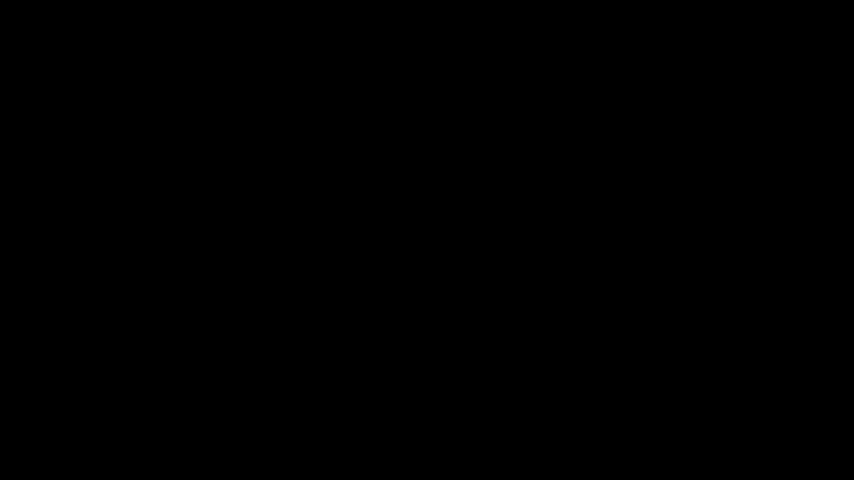

In [18]:
%%manim -ql -v WARNING Trials

class Trials(MovingCameraScene):
  dldz1_1 = MathTex(r"{{\frac{\partial L}{\partial z_1}}} = {{\frac{\partial L}{\partial y}}}.{{\frac{\partial y}{\partial z_1}}} + {{\frac{\partial L}{\partial T}}}.{{\frac{\partial T}{\partial z_1}}}").scale(0.75)
  print(dldz1_1.submobjects[6])